# ***⚓Big Data usando Spark***


*Wilmer Rodiguez*

*Luis Alfredo Acosta*

Apache Spark es un framework de programación para procesamiento de datos distribuidos diseñado para ser rápido y de propósito general

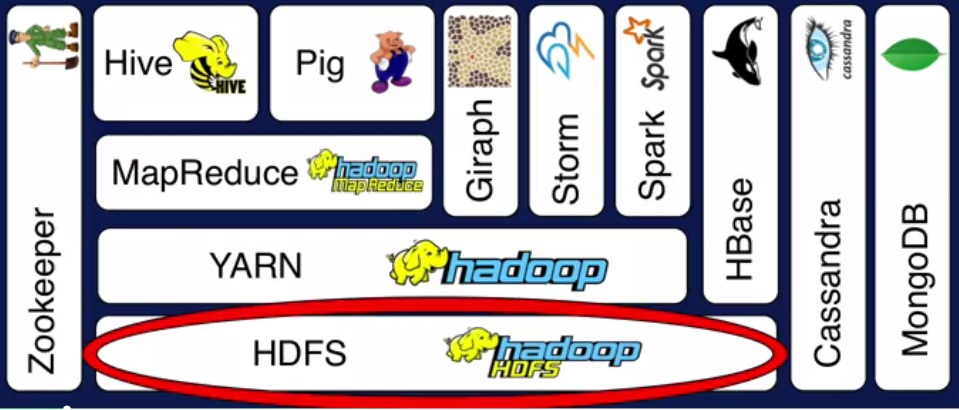

HDFS = Almacenar los datos

YARN = Encargado de distribuir tareas

Spark para almacenar datos lo hace en HDFS y para manejar las tareas lo hace a travez de Yarn

## ♈ **La gran ventaja de Spark sobre MapReduce**

Spark Trata de alamacenar los datos en la memoria Ram, es capaz de leer esos datos que se encuentran en la memoria, mientras que mapreduce tiene que estar leyendo y escribiendo constantemente de HDFS.

Spark crea un cache en memoria por decirlo de cierta forma, donde las cosas que se procesan mucho las guarda en memoria

## **⚾Como almacena los datos Spark**

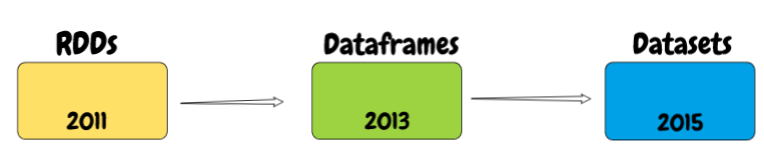

### ⛹**RDD**

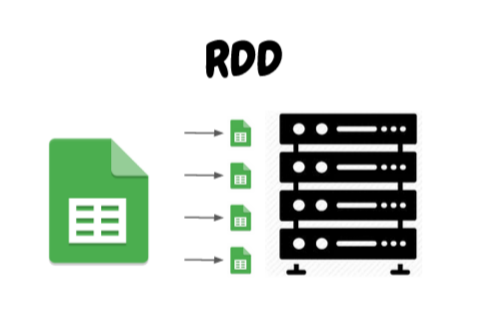

Es la colección de objetos que es capaz de almacenar los datos particionados en los múltiples nodos del clúster y también les permite realizar el procesamiento en paralelo.
* Inmutable y distribuida

### ⛪**DataFrame**

Dataframes son la colección distribuida de los puntos de datos, pero aquí, los datos están organizados en las columnas con nombre. Permiten a los desarrolladores depurar el código durante el tiempo de ejecución, lo que no estaba permitido con los RDD.



### ➿ **Conjunto de Datos**


Spark Datasets es una extensión de la API de Dataframes con los beneficios de los RDD y los conjuntos de datos. 

# **Running Pyspark in Colab**

To run spark in Colab, we need to first install all the dependencies in Colab environment i.e. Apache Spark 3.0.0 with hadoop 3.2, Java 11 and Findspark to locate the spark in the system. The tools installation can be carried out inside the Jupyter Notebook of the Colab.
Follow the steps to install the dependencies:

In [ ]:
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://apache.osuosl.org/spark/spark-3.1.3/spark-3.1.3-bin-hadoop3.2.tgz
!tar xf spark-3.1.3-bin-hadoop3.2.tgz 
!pip install -q findspark

Now that you installed Spark and Java in Colab, it is time to set the environment path which enables you to run Pyspark in your Colab environment. Set the location of Java and Spark by running the following code:

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.3-bin-hadoop3.2"

Run a local spark session to test your installation:

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark import SparkContext
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = SparkContext.getOrCreate()

In [ ]:
#Creamos un RDD
nums = sc.parallelize([1,2,3,4])
squared = nums.map(lambda x: x * x).collect()
for num in squared:
  print (num)

1
4
9
16


# **First App**

First Spark program

Upload a file to colab

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving movietweets.csv to movietweets.csv
Saving auto-data.csv to auto-data (1).csv
User uploaded file "movietweets.csv" with length 5528 bytes
User uploaded file "auto-data.csv" with length 11547 bytes


In [ ]:
ls

'auto-data (1).csv'   movietweets.csv   spark-3.1.3-bin-hadoop3.2/
 auto-data.csv        sample_data/      spark-3.1.3-bin-hadoop3.2.tgz


Create an RDD by loading from a file

In [ ]:
tweetsRDD = sc.textFile("movietweets.csv")

Show top 5 records

In [ ]:
tweetsRDD.take(5)

['positive,The Da Vinci Code book is just awesome.',
 'positive,i liked the Da Vinci Code a lot.',
 'positive,i liked the Da Vinci Code a lot.',
 "positive,I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.",
 "positive,that's not even an exaggeration ) and at midnight we went to Wal-Mart to buy the Da Vinci Code"]

Transform Data - change to upper Case

In [ ]:
ucRDD = tweetsRDD.map( lambda x : x.upper() )
ucRDD.take(5)

['POSITIVE,THE DA VINCI CODE BOOK IS JUST AWESOME.',
 'POSITIVE,I LIKED THE DA VINCI CODE A LOT.',
 'POSITIVE,I LIKED THE DA VINCI CODE A LOT.',
 "POSITIVE,I LIKED THE DA VINCI CODE BUT IT ULTIMATLY DIDN'T SEEM TO HOLD IT'S OWN.",
 "POSITIVE,THAT'S NOT EVEN AN EXAGGERATION ) AND AT MIDNIGHT WE WENT TO WAL-MART TO BUY THE DA VINCI CODE"]

Action - Count the number of tweets

In [ ]:
tweetsRDD.count()

100

# **Spark Operations**

First Spark program

Load from a collection

In [ ]:
collData = sc.parallelize([4,3,8,5,8])
collData.collect()

[4, 3, 8, 5, 8]

Load the file. Lazy initialization

In [ ]:
autoData = sc.textFile("auto-data.csv")
autoData.cache()
#Loads only now.
print(autoData.count())
print(autoData.first())
print(autoData.take(5))
new_rdd = sc.parallelize(autoData.take(5))

198
MAKE,FUELTYPE,ASPIRE,DOORS,BODY,DRIVE,CYLINDERS,HP,RPM,MPG-CITY,MPG-HWY,PRICE
['MAKE,FUELTYPE,ASPIRE,DOORS,BODY,DRIVE,CYLINDERS,HP,RPM,MPG-CITY,MPG-HWY,PRICE', 'subaru,gas,std,two,hatchback,fwd,four,69,4900,31,36,5118', 'chevrolet,gas,std,two,hatchback,fwd,three,48,5100,47,53,5151', 'mazda,gas,std,two,hatchback,fwd,four,68,5000,30,31,5195', 'toyota,gas,std,two,hatchback,fwd,four,62,4800,35,39,5348']


In [ ]:
for line in new_rdd.collect():
    print(line)

MAKE,FUELTYPE,ASPIRE,DOORS,BODY,DRIVE,CYLINDERS,HP,RPM,MPG-CITY,MPG-HWY,PRICE
subaru,gas,std,two,hatchback,fwd,four,69,4900,31,36,5118
chevrolet,gas,std,two,hatchback,fwd,three,48,5100,47,53,5151
mazda,gas,std,two,hatchback,fwd,four,68,5000,30,31,5195
toyota,gas,std,two,hatchback,fwd,four,62,4800,35,39,5348


Save to a local file. First collect the RDD to the master and then save as local file.

In [ ]:
autoDataFile = open("auto-data-saved.csv","w")
autoDataFile.write("\n".join(new_rdd.collect()))
autoDataFile.close()

In [ ]:
!cat auto-data-saved.csv

MAKE,FUELTYPE,ASPIRE,DOORS,BODY,DRIVE,CYLINDERS,HP,RPM,MPG-CITY,MPG-HWY,PRICE
subaru,gas,std,two,hatchback,fwd,four,69,4900,31,36,5118
chevrolet,gas,std,two,hatchback,fwd,three,48,5100,47,53,5151
mazda,gas,std,two,hatchback,fwd,four,68,5000,30,31,5195
toyota,gas,std,two,hatchback,fwd,four,62,4800,35,39,5348

# **Transformations**

Map and create a new RDD

In [ ]:
tsvData=autoData.map(lambda x : x.replace(",","\t"))
tsvData.take(5)

['MAKE\tFUELTYPE\tASPIRE\tDOORS\tBODY\tDRIVE\tCYLINDERS\tHP\tRPM\tMPG-CITY\tMPG-HWY\tPRICE',
 'subaru\tgas\tstd\ttwo\thatchback\tfwd\tfour\t69\t4900\t31\t36\t5118',
 'chevrolet\tgas\tstd\ttwo\thatchback\tfwd\tthree\t48\t5100\t47\t53\t5151',
 'mazda\tgas\tstd\ttwo\thatchback\tfwd\tfour\t68\t5000\t30\t31\t5195',
 'toyota\tgas\tstd\ttwo\thatchback\tfwd\tfour\t62\t4800\t35\t39\t5348']

Filter and create a new RDD

In [ ]:
toyotaData=autoData.filter(lambda x: "toyota" in x)
toyotaData.count()

32

FlatMap

In [ ]:
words=toyotaData.flatMap(lambda line: line.split(","))
words.count()
words.take(20)

['toyota',
 'gas',
 'std',
 'two',
 'hatchback',
 'fwd',
 'four',
 '62',
 '4800',
 '35',
 '39',
 '5348',
 'toyota',
 'gas',
 'std',
 'two',
 'hatchback',
 'fwd',
 'four',
 '62']

Distinct

In [ ]:
for numbData in collData.distinct().collect():
    print(numbData)

4
8
3
5


Set operations

In [ ]:
words1 = sc.parallelize(["hello","war","peace","world"])
words2 = sc.parallelize(["war","peace","universe"])

for unions in words1.union(words2).distinct().collect():
    print(unions)
print("------------------")
for intersects in words1.intersection(words2).collect():
    print(intersects)

hello
peace
world
universe
war
------------------
peace
war


Using functions for transformation cleanse and transform an RDD

In [ ]:
def cleanseRDD(autoStr) :
    if isinstance(autoStr, int) :
        return autoStr
    attList=autoStr.split(",")
    #convert doors to a number str
    if attList[3] == "two" :
         attList[3]="2"
    elif attList[3] == "four" :
         attList[3]="4"
    #Convert Drive to uppercase
    attList[5] = attList[5].upper()
    return ",".join(attList)
    
cleanedData=autoData.map(cleanseRDD)

for line in autoData.take(5):
  print(line)
print("------------------")
for line in cleanedData.take(5):
  print(line)

MAKE,FUELTYPE,ASPIRE,DOORS,BODY,DRIVE,CYLINDERS,HP,RPM,MPG-CITY,MPG-HWY,PRICE
subaru,gas,std,two,hatchback,fwd,four,69,4900,31,36,5118
chevrolet,gas,std,two,hatchback,fwd,three,48,5100,47,53,5151
mazda,gas,std,two,hatchback,fwd,four,68,5000,30,31,5195
toyota,gas,std,two,hatchback,fwd,four,62,4800,35,39,5348
------------------
MAKE,FUELTYPE,ASPIRE,DOORS,BODY,DRIVE,CYLINDERS,HP,RPM,MPG-CITY,MPG-HWY,PRICE
subaru,gas,std,2,hatchback,FWD,four,69,4900,31,36,5118
chevrolet,gas,std,2,hatchback,FWD,three,48,5100,47,53,5151
mazda,gas,std,2,hatchback,FWD,four,68,5000,30,31,5195
toyota,gas,std,2,hatchback,FWD,four,62,4800,35,39,5348


# **Actions**

In [ ]:
def fun(element_act, acum_act):
  return acum_act+element_act

Reduce - compute the sum

In [ ]:
collData.reduce(lambda x,y: x+y)

28

Find the shortest line

In [ ]:
autoData.reduce(lambda x,y: x if len(x) < len(y) else y)

'bmw,gas,std,two,sedan,rwd,six,182,5400,16,22,41315'